In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('D:\\Projects\\AI\\SandBox\\sample_data_set\\loan_applications_15000.csv')

In [19]:
df.head(5)

,application_id,age,gender,marital_status,income,employment_length,education,loan_amount,loan_term,interest_rate,...,loan_to_value_ratio,debt_to_income_ratio,monthly_debt,savings_balance,checking_balance,recent_inquiries,has_coapplicant,self_employed,residential_status,loan_approved
0,1,39,Male,Single,44264.151547,7.310825,PhD,3163.890588,60,8.057918,...,72.652609,23.433957,1094.931106,2706.473333,3850.359704,0,1,0,Owned,1
1,2,33,Male,Single,29503.167681,0.641891,Bachelor,4818.949502,36,10.639471,...,58.399112,36.850782,247.484077,1479.083746,1251.947446,2,0,0,Rented,0
2,3,41,Female,Married,57145.197299,0.507735,Master,12612.307400,24,7.344056,...,44.205625,34.477886,1572.720412,1155.368626,2558.544490,1,1,0,Rented,0
3,4,50,Male,Divorced,57028.491868,9.504225,Master,3467.420308,24,10.179238,...,66.509167,19.826694,985.868111,1954.800742,13239.090917,3,0,1,Rented,0
4,5,32,Female,Married,33737.766015,1.279456,High School,13710.043299,48,7.120236,...,68.783745,36.470701,510.396974,1957.376675,32.632296,1,0,0,Owned,0


In [20]:
df.columns

Index(['application_id', 'age', 'gender', 'marital_status', 'income',
       'employment_length', 'education', 'loan_amount', 'loan_term',
       'interest_rate', 'credit_score', 'credit_history_length',
       'existing_loans', 'credit_utilization', 'property_value',
       'loan_to_value_ratio', 'debt_to_income_ratio', 'monthly_debt',
       'savings_balance', 'checking_balance', 'recent_inquiries',
       'has_coapplicant', 'self_employed', 'residential_status',
       'loan_approved'],
      dtype='object')

In [21]:
df['residential_status'].unique()

array(['Owned', 'Rented', 'With Parents'], dtype=object)

In [22]:
df['gender'] = df['gender'].map({'male': 1, 'female': 0})
df['marital_status'] = df['marital_status'].map({'Single':0, 'Married':1, 'Divorced':2})
df['education'] = df['education'].map({
    'PhD':0,
    'Bachelor':1,
    'Master':2,
    'High School':3
})
df['residential_status'] = df['residential_status'].map({
    'Owned':0,
    'Rental':1,
    'With Parents':2
})

In [23]:
X = df[['application_id', 'age', 'gender', 'marital_status', 'income',
       'employment_length', 'education', 'loan_amount', 'loan_term',
       'interest_rate', 'credit_score', 'credit_history_length',
       'existing_loans', 'credit_utilization', 'property_value',
       'loan_to_value_ratio', 'debt_to_income_ratio', 'monthly_debt',
       'savings_balance', 'checking_balance', 'recent_inquiries',
       'has_coapplicant', 'self_employed', 'residential_status']]

In [24]:
Y = df['loan_approved']

In [25]:
X_train, X_test, Y_train, Y_test =train_test_split(X,Y,test_size=0.2,random_state=42)

In [26]:
model = RandomForestClassifier()

In [27]:
model.fit(X_train,Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
pred = model.predict(X_test)

In [29]:
accuracy_score(Y_test,pred)

0.9993333333333333

In [30]:
confusion_matrix(Y_test,pred)

array([[2455,    0],
       [   2,  543]])

In [32]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2455
           1       1.00      1.00      1.00       545

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



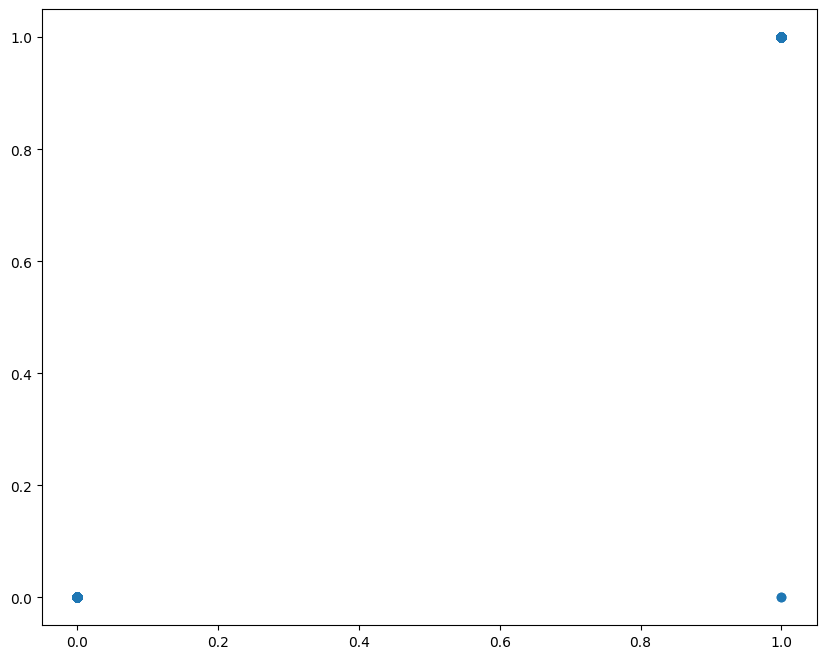

In [38]:
plt.figure(figsize=(10,8))
plt.scatter(Y_test,pred)
plt.show()